In [1]:
import os
import random
import torch
import tqdm
import numpy as np

from base_evaluation import reconstruction_metric, text_img_match_metric, get_prompt_list
from evaluator import Evaluator

from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    EulerAncestralDiscreteScheduler, 
    UNet2DConditionModel,
)

from lora_diffusion import tune_lora_scale, patch_pipe
pretrained_model_name_or_path = "/DATA/DATANAS1/zhangyip/models/stable-diffusion-2-1-base"
pipeline = StableDiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path,
    torch_dtype=torch.float16,
    safety_checker=None
)
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)
pipeline.set_progress_bar_config(disable=True)
pipeline = pipeline.to("cuda")

/home/chenhong/.conda/envs/diffusion/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [2]:
name, prompt_class = ("dog8", "dog")
unique_token = name+ "</w>"
origin_root = f"/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data/{name}"
model_path = f"/DATA/DATANAS1/zhangyip/SD_img2txt_prompt/training_scripts/output_baseline/dreambooth_a_prompt/{name}/checkpoints/lora_weight_e7_s800.pt"
patch_pipe(
        pipeline,
        model_path,
        patch_text=True,
        patch_ti=False,
        patch_unet=True,
    )
tune_lora_scale(pipeline.unet, 1.0)
tune_lora_scale(pipeline.unet, 1.0)

LoRA : Patching Unet
LoRA : Patching text encoder


a dog8</w> dog is playing with a butterfly in the red flowers


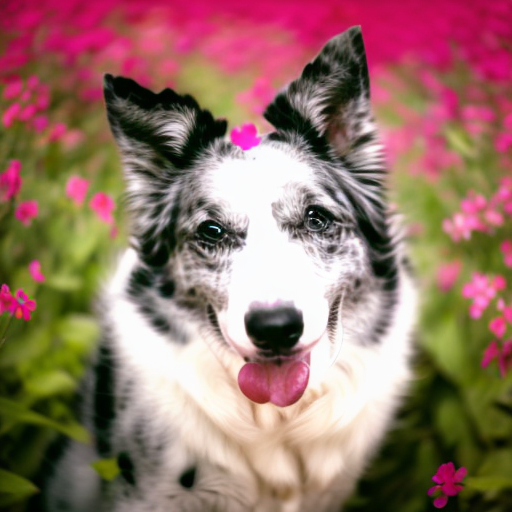

In [18]:
test_prompt = "a " + unique_token  +" "+ prompt_class + " is playing with a butterfly in the red flowers" 
print(test_prompt)
image = pipeline(test_prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image

a dog8</w> dog is running beside an airplane


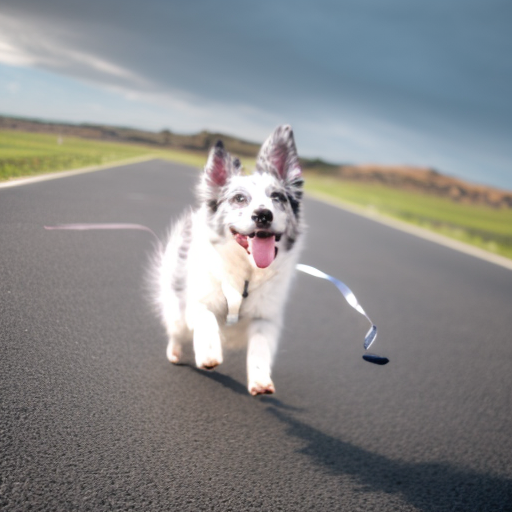

In [6]:
test_prompt = "a " + unique_token  +" "+ prompt_class + " is running beside an airplane"
print(test_prompt)
image = pipeline(test_prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image